In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.utils import to_categorical,img_to_array
import matplotlib.pyplot as palt

In [2]:
x_train_g = np.load("C:/Users/AKASH/Desktop/train_validation/train_gesture.npy")
x_test_l= np.load("C:/Users/AKASH/Desktop/train_validation/train_gesture_labels.npy")

y_train_g=np.load("C:/Users/AKASH/Desktop/train_validation/validation_gesture.npy")
y_test_l=np.load("C:/Users/AKASH/Desktop/train_validation/validation_gesture_labels.npy")

In [3]:
x_train_g=x_train_g.astype("float32")/255.0
y_train_g_=y_train_g.astype("float32")/255.0

In [41]:
x_train_g= x_train_g[...,np.newaxis]
y_train_g= y_train_g[..., np.newaxis]

In [42]:
#converet the labels into one hot encoding

num=len(np.unique(x_test_l))
x_test_l=to_categorical(x_test_l,num)
y_test_l=to_categorical(y_test_l,num)


In [43]:
model=keras.models.Sequential()

model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=x_train_g.shape[1:]))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(num,activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 64)              

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_g, x_test_l,
    validation_data=(y_train_g, y_test_l),
    epochs=6,
    batch_size=32
)



Epoch 1/6
578/578 [==============================] - 102s 176ms/step - loss: 0.6038 - accuracy: 0.7632 - val_loss: 107.5078 - val_accuracy: 0.5337
Epoch 3/6
578/578 [==============================] - 112s 194ms/step - loss: 0.5425 - accuracy: 0.7888 - val_loss: 163.0538 - val_accuracy: 0.4696
Epoch 4/6
578/578 [==============================] - 91s 158ms/step - loss: 0.4785 - accuracy: 0.8154 - val_loss: 141.5773 - val_accuracy: 0.5380
Epoch 5/6
578/578 [==============================] - 46s 80ms/step - loss: 0.4177 - accuracy: 0.8417 - val_loss: 183.3148 - val_accuracy: 0.5126
Epoch 6/6
578/578 [==============================] - 45s 78ms/step - loss: 0.3552 - accuracy: 0.8654 - val_loss: 208.9758 - val_accuracy: 0.5215


1/1 [==============================] - 0s 33ms/step


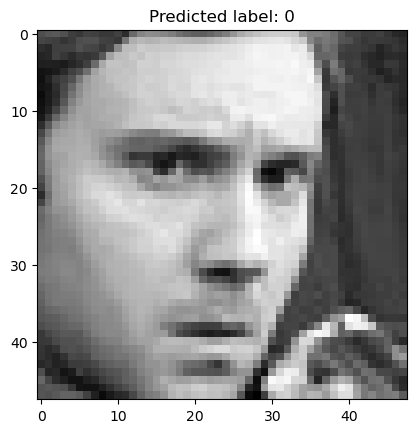

1/1 [==============================] - 0s 41ms/step
Predicted class: 0


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Select an image from the training set
image_index = 0  # Change this index to test other images
image = x_train_g[image_index]

# Display the image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted label: {np.argmax(model.predict(image.reshape(1, *image.shape)))}")
plt.show()

# Make the prediction
image_reshaped = image.reshape(1, *image.shape)  # Reshape the image for the model
prediction = model.predict(image_reshaped)

# Get the predicted class
predicted_class = np.argmax(prediction)  # This gives the class with the highest probability
print(f"Predicted class: {predicted_class}")
